In [2]:
#импорт нужных библиотек
import os
from dotenv import load_dotenv
import requests as r
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so

In [3]:
#выгрузка переменных окружения и создание папки для графиков
load_dotenv()

DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')

current_dir = os.getcwd() 
charts_folder = os.path.join(current_dir, 'charts')

if not os.path.exists(charts_folder):
    os.makedirs(charts_folder)

In [68]:
#добавляем датафрейм с регистрациями
#response_registrations = r.get("https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01")
response_registrations = r.get(f"{API_URL}/registrations?begin={DATE_BEGIN}&end={DATE_END}")
json_data_registrations = response_registrations.json()
df_regs = pd.DataFrame(json_data_registrations)
df_regs

datetime                               user_id  \
0      2023-03-01T07:40:13  2e0f6bb8-b029-4f45-a786-2b53990d37f1   
1      2023-03-01T13:14:00  f007f97c-9d8b-48b5-af08-119bb8f6d9b6   
2      2023-03-01T03:05:50  24ff46ae-32b3-4a74-8f27-7cf0b8f32f15   
3      2023-03-01T00:04:47  3e9914e1-5d73-4c23-b25d-b59a3aeb2b60   
4      2023-03-01T18:31:52  27f875fc-f8ce-4aeb-8722-0ecb283d0760   
...                    ...                                   ...   
21831  2023-08-31T07:32:08  a94b4a28-f25c-433c-b4ef-85af7d5b0c11   
21832  2023-08-31T23:25:50  fc709c6b-528b-40d8-8980-c2c278e5a628   
21833  2023-08-31T19:29:18  11e32805-7571-4108-8e50-e211d051bf7e   
21834  2023-08-31T19:38:54  bce7b818-768b-434a-b6af-573cd60bff7f   
21835  2023-08-31T08:36:05  fe03e08a-8e86-4b5f-9a50-c18a02b0d234   

                            email platform registration_type  
0               ebyrd@example.org      web            google  
1        knightgerald@example.org      web             email  
2      cherylthompson@example.com      web             apple  
3           halldavid@example.org      web             email  
4            denise86@example.net      web            google  
...                           ...      ...               ...  
21831         ikelley@example.net      ios             apple  
21832     brittanycox@example.net      ios             apple  
21833           aryan@example.net      ios             apple  
21834       emartinez@example.net      ios             email  
21835      terriperry@example.net      ios             email  

[21836 rows x 5 columns]

In [69]:
#добавляем датафрейм с посещениями
#response_visits = r.get("https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01")
response_visits = r.get(f"{API_URL}/visits?begin={DATE_BEGIN}&end={DATE_END}")
json_data_visits = response_visits.json()
df_visits = pd.DataFrame(json_data_visits)
df_visits

visit_id platform  \
0       1de9ea66-70d3-4a1f-8735-df5ef7697fb9      web   
1       f149f542-e935-4870-9734-6b4501eaf614      web   
2       08f0ebd4-950c-4dd9-8e97-b5bdf073eed1      web   
3       19322fed-157c-49c6-b16e-2d5cabeb9592      web   
4       04762a22-3c9f-40c9-9ac9-6628c4381836      web   
...                                      ...      ...   
263454  6d2e2f5b-970b-4dfe-8f57-25711a5b2a5d      web   
263455  1d91535e-d984-4f76-bbaa-c14c0fd4f2e2      web   
263456  f2496721-7126-430d-976e-777a6cdccb4f      web   
263457  f2496721-7126-430d-976e-777a6cdccb4f      web   
263458  73047125-de44-4d65-8229-7218acff4ddc      web   

                                               user_agent             datetime  
0       Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T10:36:22  
1       Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...  2023-03-01T06:25:00  
2       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...  2023-03-01T10:26:13  
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-03-01T12:33:06  
4       Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-03-01T01:38:35  
...                                                   ...                  ...  
263454  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...  2023-08-29T10:43:29  
263455  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-08-29T19:29:16  
263456  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-08-29T12:51:11  
263457  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  2023-08-29T21:45:08  
263458  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...  2023-08-30T19:19:04  

[263459 rows x 4 columns]

## Шаг 3

In [91]:
#обрабатываем регистрации
#filtered_regs.sort_values(['datetime', 'user_id'], inplace=True)
df_regs['date_group'] = pd.to_datetime(df_regs['datetime']).dt.date
df_regs['date_group'] = pd.to_datetime(df_regs['date_group'], format='%Y-%m-%d')
filtered_regs = df_regs.drop(['datetime', 'email', 'registration_type'], axis=1)

filtered_regs = filtered_regs.groupby(['date_group', 'platform']).agg('count')
filtered_regs.columns = ['registrations']
filtered_regs = filtered_regs.reset_index()
filtered_regs

date_group platform  registrations
0   2023-03-01  android             61
1   2023-03-01      ios             18
2   2023-03-01      web              8
3   2023-03-02  android             59
4   2023-03-02      ios             24
..         ...      ...            ...
547 2023-08-30      ios             40
548 2023-08-30      web             34
549 2023-08-31  android             42
550 2023-08-31      ios             36
551 2023-08-31      web             46

[552 rows x 3 columns]

In [88]:
#обрабатываем посещения
df_visits['datetime'] = pd.to_datetime(df_visits['datetime'])
filtered_visits = df_visits.drop(['user_agent'], axis=1)
filtered_visits = filtered_visits.drop(filtered_visits[filtered_visits['platform'] == 'bot'].index)
filtered_visits.sort_values(by=['visit_id', 'datetime'], ascending=[True, False])

filtered_visits = filtered_visits.groupby(['visit_id', 'platform']).agg('max').reset_index()
filtered_visits['date_group'] = pd.to_datetime(filtered_visits['datetime']).dt.date
filtered_visits['date_group'] = pd.to_datetime(filtered_visits['date_group'], format='%Y-%m-%d')
filtered_visits = filtered_visits.drop(['datetime'], axis=1)

filtered_visits = filtered_visits.groupby(['date_group', 'platform']).agg('count')
filtered_visits.columns = ['visits']
filtered_visits = filtered_visits.reset_index()
filtered_visits

date_group platform  visits
0   2023-03-01  android      75
1   2023-03-01      ios      22
2   2023-03-01      web     279
3   2023-03-02  android      67
4   2023-03-02      ios      31
..         ...      ...     ...
547 2023-08-30      ios      66
548 2023-08-30      web    1227
549 2023-08-31  android      57
550 2023-08-31      ios      50
551 2023-08-31      web     721

[552 rows x 3 columns]

In [99]:
#объединяем датафреймы и считаем конверсию
conv_df = filtered_visits.merge(
    filtered_regs,
    left_on=['date_group', 'platform'],
    right_on=['date_group', 'platform']
)
conv_df['conversion'] = conv_df['registrations'] / conv_df['visits'] * 100
conv_df = conv_df.sort_values(by=['date_group'])
conv_df = conv_df.sort_index()
conv_df

date_group platform  visits  registrations  conversion
0   2023-03-01  android      75             61   81.333333
1   2023-03-01      ios      22             18   81.818182
2   2023-03-01      web     279              8    2.867384
3   2023-03-02  android      67             59   88.059701
4   2023-03-02      ios      31             24   77.419355
..         ...      ...     ...            ...         ...
547 2023-08-30      ios      66             40   60.606061
548 2023-08-30      web    1227             34    2.770986
549 2023-08-31  android      57             42   73.684211
550 2023-08-31      ios      50             36   72.000000
551 2023-08-31      web     721             46    6.380028

[552 rows x 5 columns]

In [100]:
conv_df.to_json('conversion.json')

## Шаг 4

In [102]:
#добавляем датафрейм с рекламой
ads = pd.read_csv('ads.csv')
ads

date utm_source utm_medium                utm_campaign  \
0    2023-03-01T10:54:41     google        cpc  advanced_algorithms_series   
1    2023-03-02T10:32:35     google        cpc  advanced_algorithms_series   
2    2023-03-03T19:21:40     google        cpc  advanced_algorithms_series   
3    2023-03-04T17:52:04     google        cpc  advanced_algorithms_series   
4    2023-03-05T05:35:13     google        cpc  advanced_algorithms_series   
..                   ...        ...        ...                         ...   
154  2023-09-13T05:34:02         vk     social      intro_to_python_course   
155  2023-09-14T18:25:13         vk     social      intro_to_python_course   
156  2023-09-15T15:35:47         vk     social      intro_to_python_course   
157  2023-09-16T05:30:26         vk     social      intro_to_python_course   
158  2023-09-17T02:04:39         vk     social      intro_to_python_course   

     cost  
0     212  
1     252  
2     202  
3     223  
4     265  
..    ...  
154   277  
155   221  
156   175  
157   224  
158   125  

[159 rows x 5 columns]

In [119]:
#обрабатываем датафрейм с рекламой
filtered_ads = ads
filtered_ads['date_group'] = pd.to_datetime(filtered_ads['date']).dt.date
filtered_ads['date_group'] = pd.to_datetime(filtered_ads['date_group'], format='%Y-%m-%d')
filtered_ads = filtered_ads.drop(['date', 'utm_source', 'utm_medium'], axis=1)
filtered_ads

utm_campaign  cost date_group
0    advanced_algorithms_series   212 2023-03-01
1    advanced_algorithms_series   252 2023-03-02
2    advanced_algorithms_series   202 2023-03-03
3    advanced_algorithms_series   223 2023-03-04
4    advanced_algorithms_series   265 2023-03-05
..                          ...   ...        ...
154      intro_to_python_course   277 2023-09-13
155      intro_to_python_course   221 2023-09-14
156      intro_to_python_course   175 2023-09-15
157      intro_to_python_course   224 2023-09-16
158      intro_to_python_course   125 2023-09-17

[159 rows x 3 columns]

In [110]:
#создаем датафрейм без конверсии и аггрегации по платформам
vis_and_reg = conv_df.drop(['conversion'], axis=1)
vis_and_reg = vis_and_reg.groupby(['date_group']).agg(visits=('visits', 'sum'), registrations=('registrations', 'sum'))
vis_and_reg = vis_and_reg.reset_index()
vis_and_reg

date_group  visits  registrations
0   2023-03-01     376             87
1   2023-03-02     613            106
2   2023-03-03     683            107
3   2023-03-04     647            159
4   2023-03-05     707            115
..         ...     ...            ...
179 2023-08-27     795             88
180 2023-08-28     635             83
181 2023-08-29    1268            143
182 2023-08-30    1328            101
183 2023-08-31     828            124

[184 rows x 3 columns]

In [121]:
#объединяем данные о посещениях, регистрациях и рекламе
ads_df = pd.merge(
    vis_and_reg,
    filtered_ads,
    left_on=['date_group'],
    right_on=['date_group'],
    how='left'
)
ads_df['cost'] = ads_df['cost'].fillna(0)
ads_df

date_group  visits  registrations                utm_campaign   cost
0   2023-03-01     376             87  advanced_algorithms_series  212.0
1   2023-03-02     613            106  advanced_algorithms_series  252.0
2   2023-03-03     683            107  advanced_algorithms_series  202.0
3   2023-03-04     647            159  advanced_algorithms_series  223.0
4   2023-03-05     707            115  advanced_algorithms_series  265.0
..         ...     ...            ...                         ...    ...
179 2023-08-27     795             88      intro_to_python_course  222.0
180 2023-08-28     635             83      intro_to_python_course  223.0
181 2023-08-29    1268            143      intro_to_python_course  190.0
182 2023-08-30    1328            101      intro_to_python_course  109.0
183 2023-08-31     828            124      intro_to_python_course  215.0

[184 rows x 5 columns]

In [122]:
ads_df.to_json('ads.json')

## Шаг 5

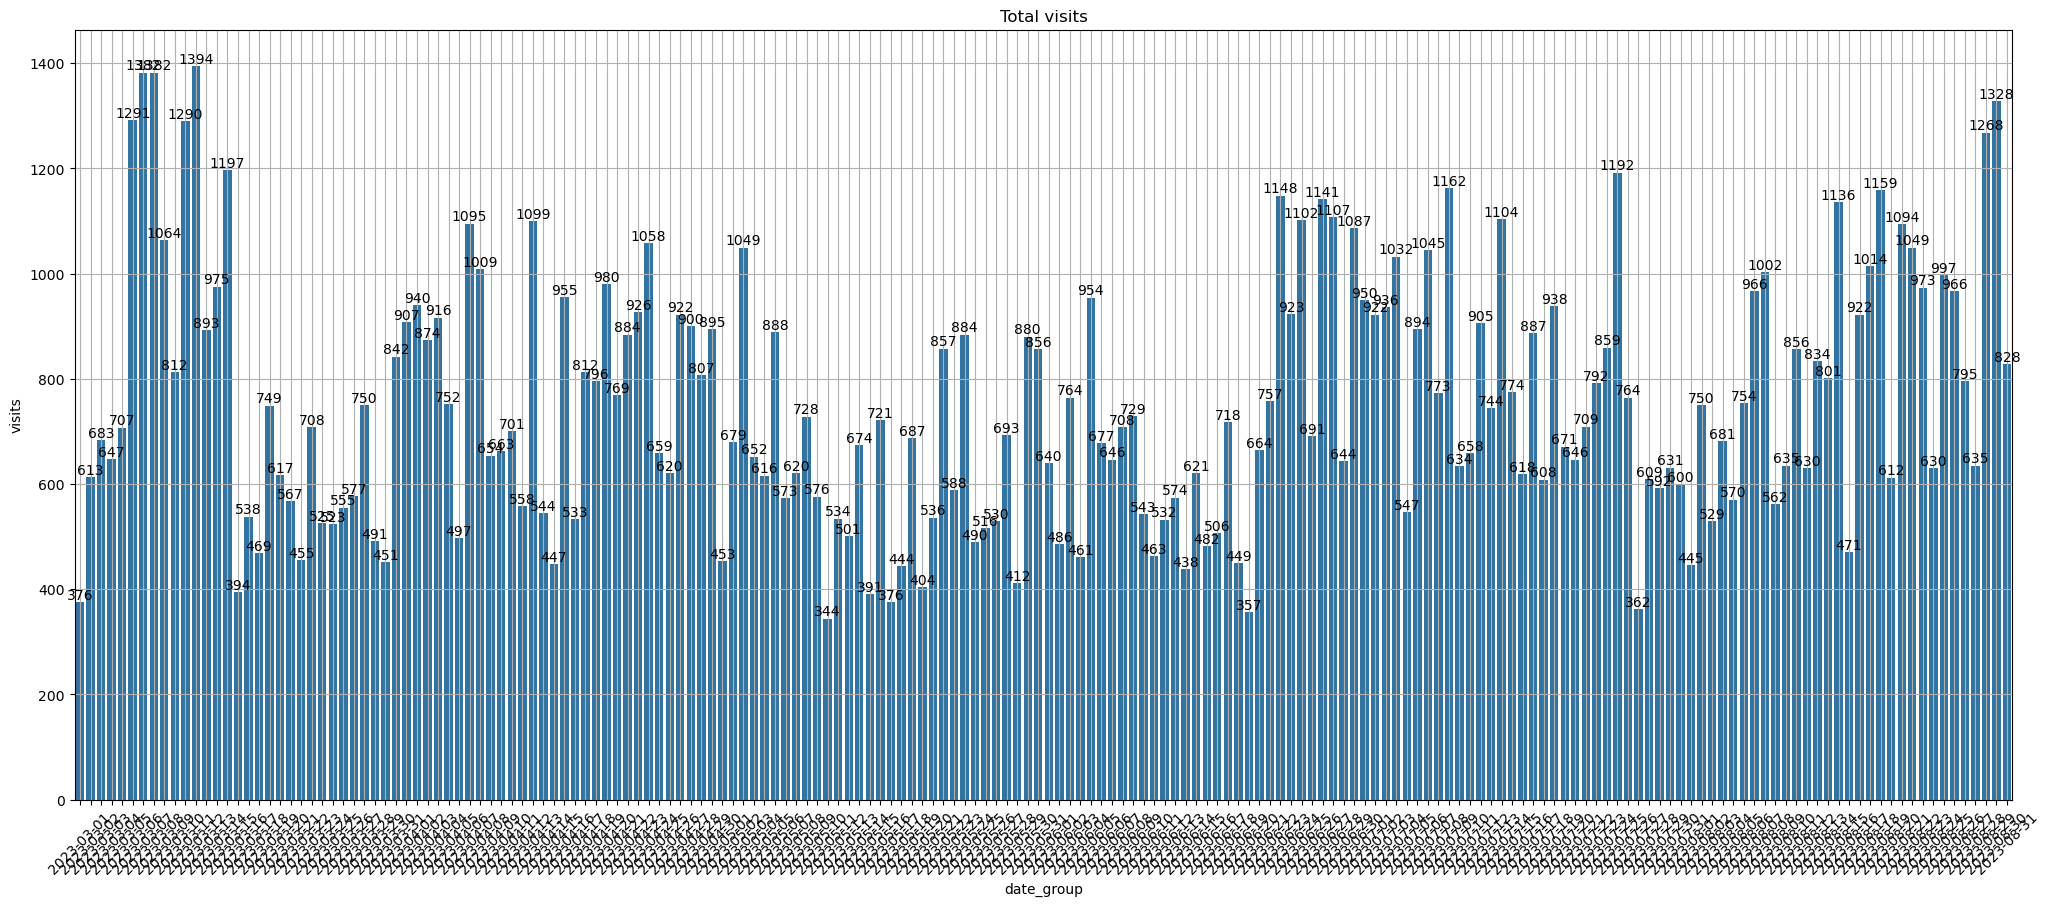

In [123]:
#1
plt.figure(figsize = (25, 10))

ax = sns.barplot(
    x='date_group',
    y='visits',
    data=ads_df
)
ax.bar_label(ax.containers[0])
plt.title('Total visits')
plt.xlabel('date_group')
plt.xticks(rotation=45)
plt.grid()

plt.savefig('./charts/visits_by_date.png')
plt.show()

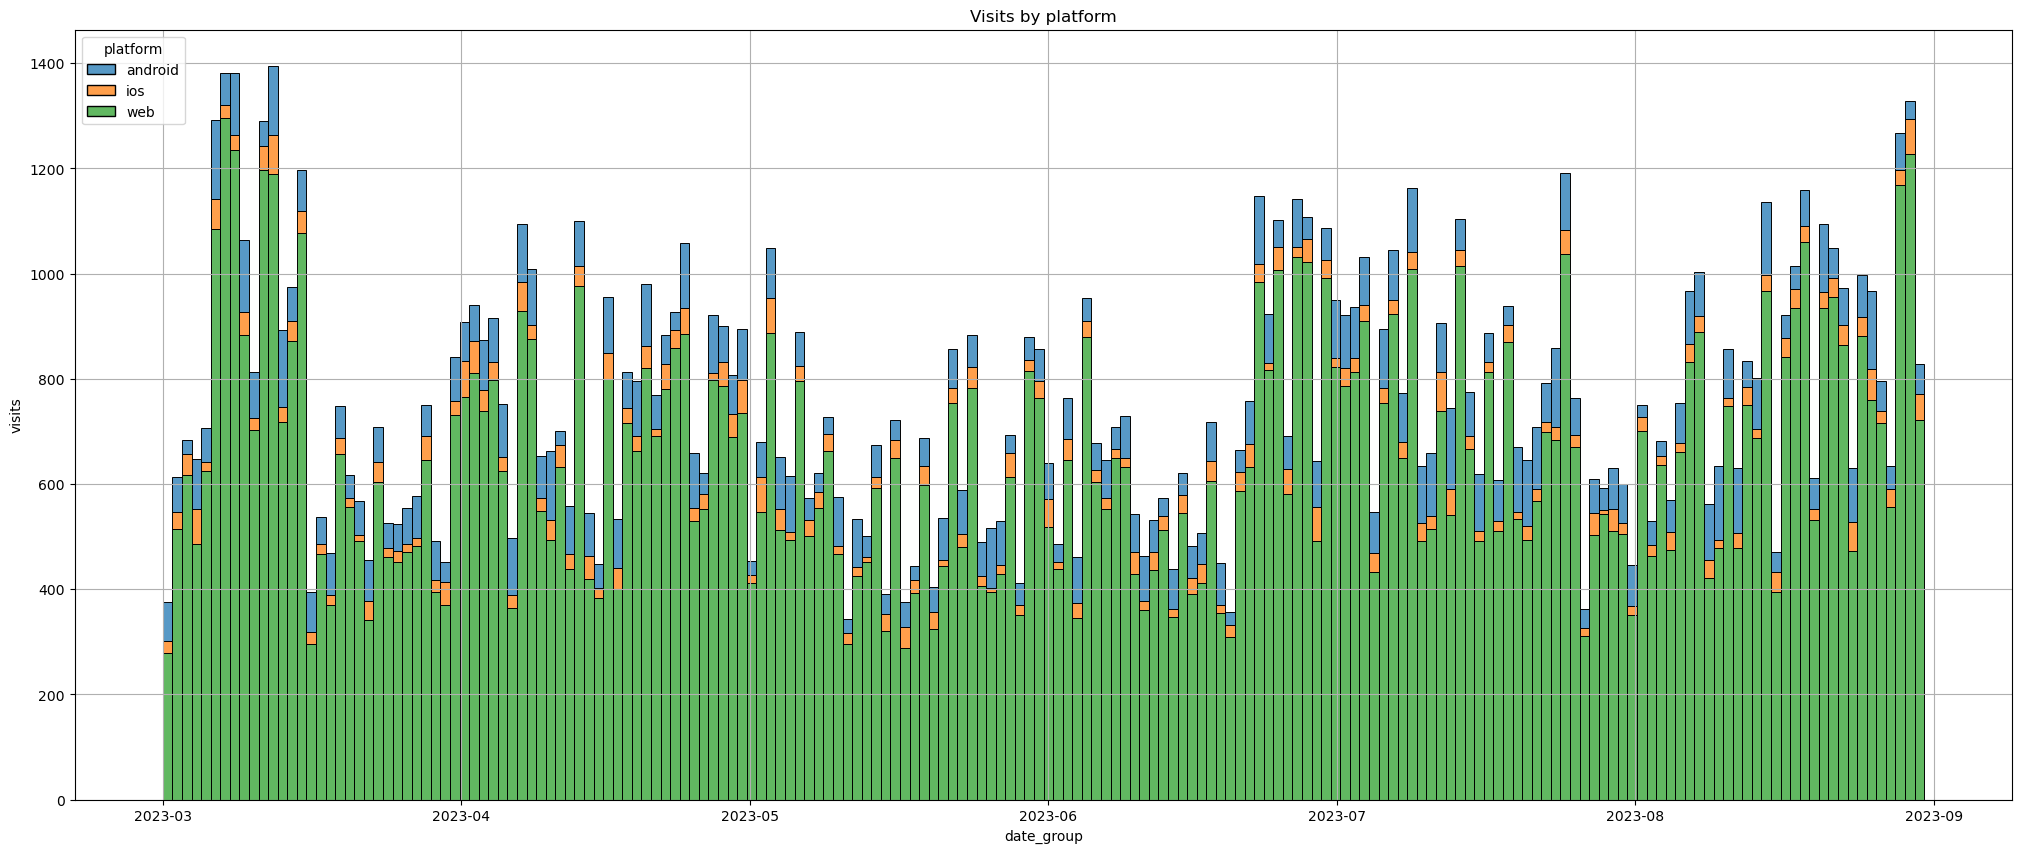

In [134]:
#2

plt.figure(figsize=(25, 10))

ax = sns.histplot(
    x='date_group',
    weights='visits',
    hue='platform',
    data=conv_df,
    multiple='stack',
    bins=184
)

plt.title('Visits by platform')
plt.xlabel('date_group')
plt.ylabel('visits')
plt.grid(True)

plt.savefig('./charts/visits_by_platform.png')
plt.show()

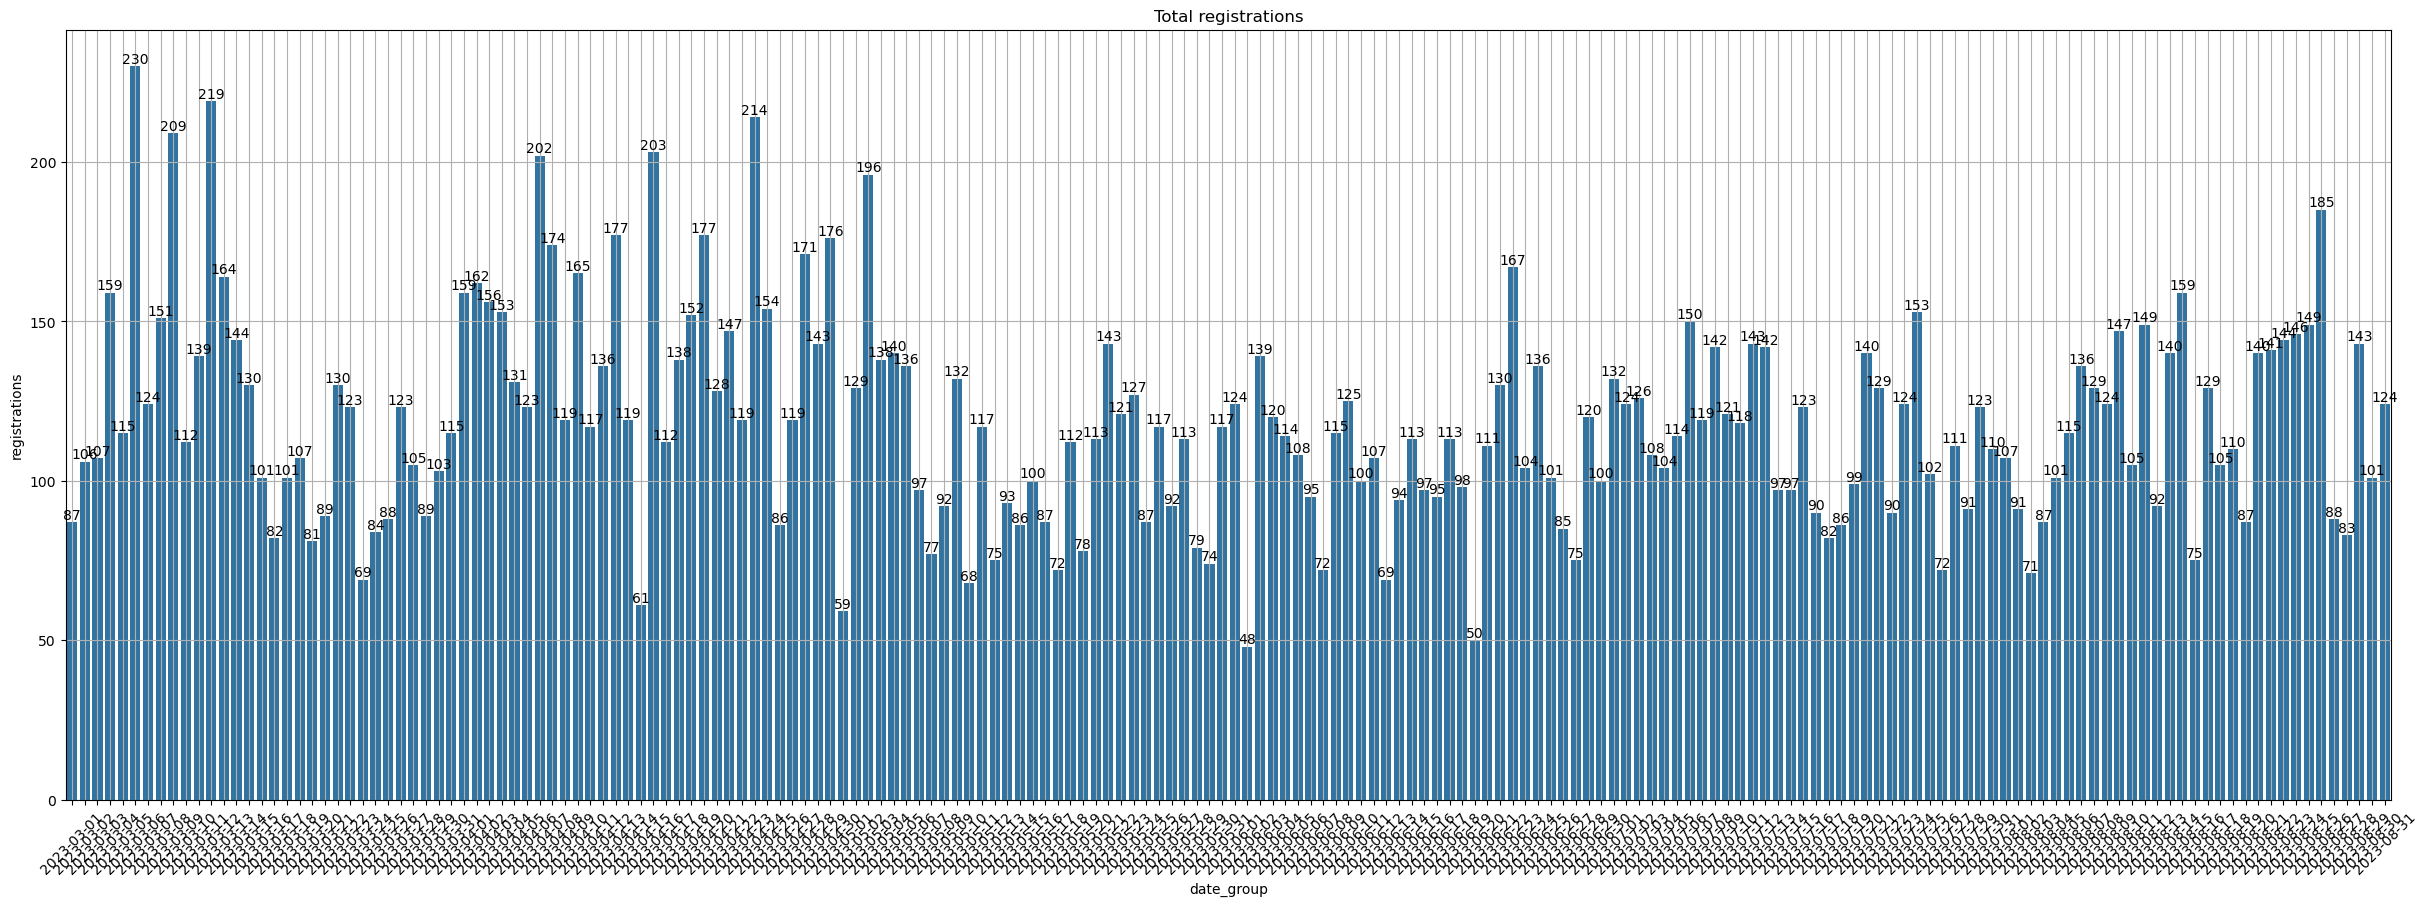

In [135]:
#3

plt.figure(figsize = (30, 10))

ax = sns.barplot(
    x = 'date_group',
    y = 'registrations',
    data=ads_df
)

ax.bar_label(ax.containers[0])
plt.title('Total registrations')
plt.xticks(rotation=45)
plt.grid()

plt.savefig('./charts/registrations_by_date.png')
plt.show()

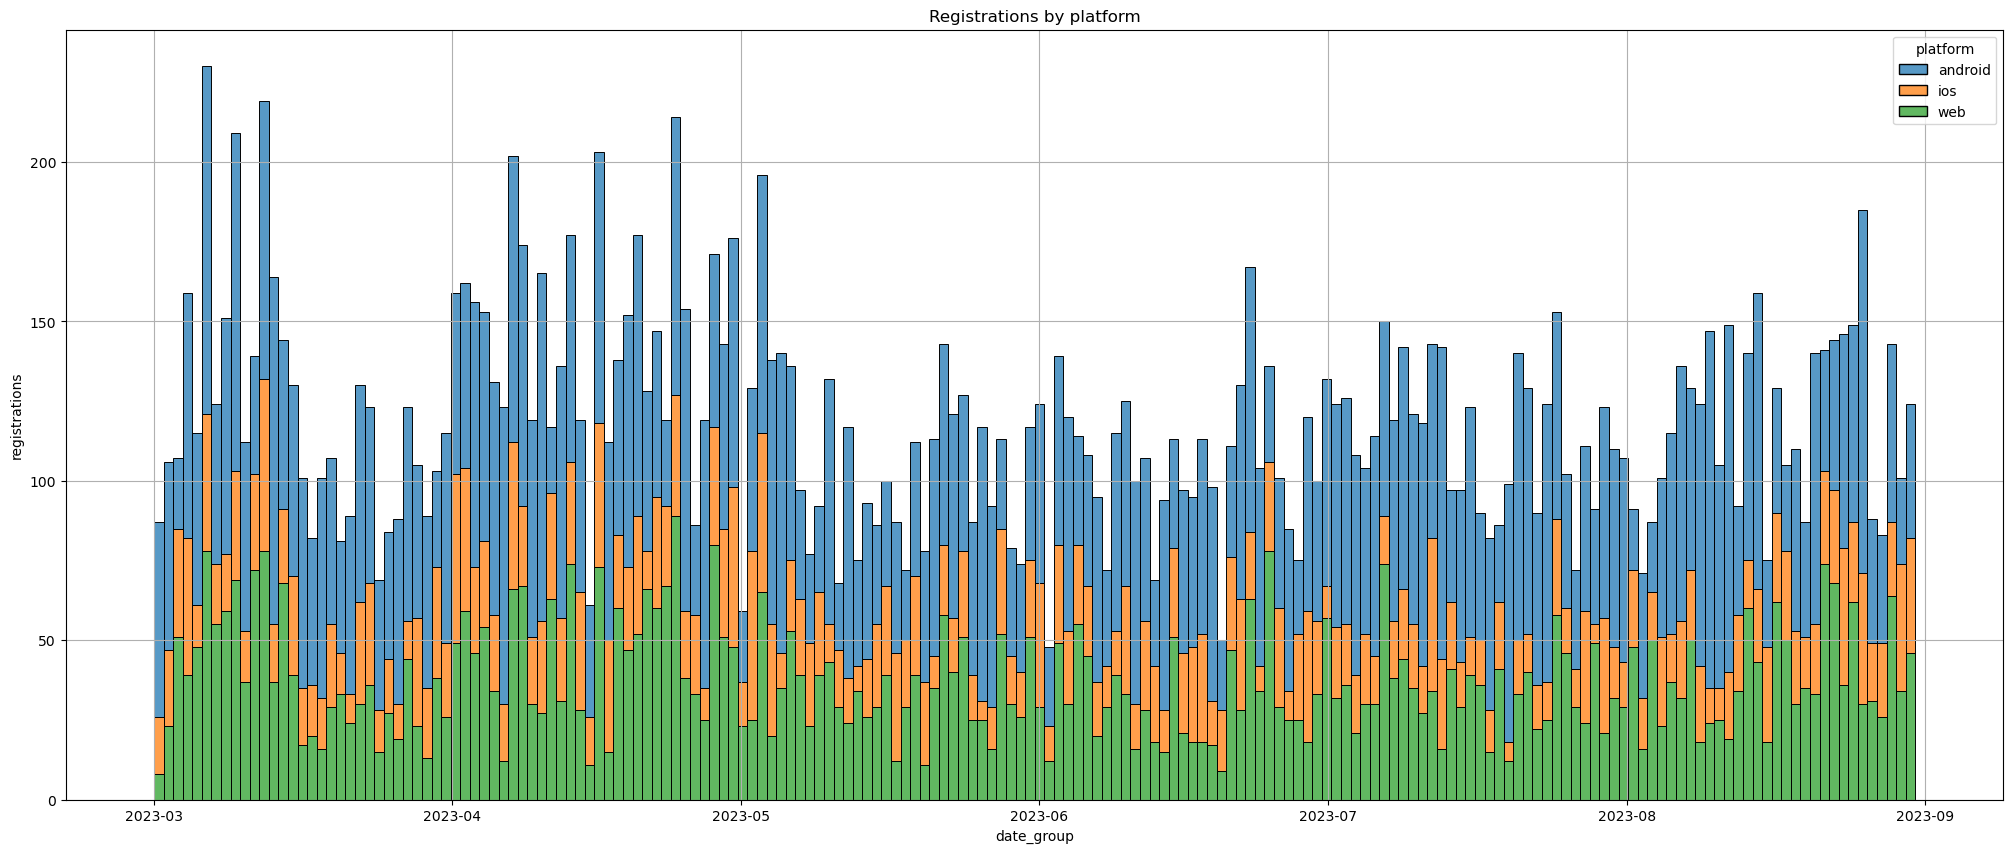

In [137]:
#4

fig, ax = plt.subplots(figsize=(25, 10))

ax = sns.histplot(
    x='date_group',
    weights='registrations',
    hue='platform',
    data=conv_df,
    multiple='stack',
    bins=184
)


plt.title('Registrations by platform')
plt.xlabel('date_group')
plt.ylabel('registrations')
plt.grid(True)

plt.savefig('./charts/registrations_by_platform.png')
plt.show()

In [138]:
#создаем датафрейм с общей конверсией
overall_conv = conv_df.drop(['platform', 'conversion'], axis=1)
overall_conv = overall_conv.groupby('date_group').agg(visits=('visits', 'sum'), registrations=('registrations', 'sum'))
overall_conv['conversion'] = round (overall_conv['registrations'] / overall_conv['visits'] * 100, 2)
overall_conv = overall_conv.drop(['visits', 'registrations'], axis=1)
overall_conv = overall_conv.reset_index()
overall_conv

date_group  conversion
0   2023-03-01       23.14
1   2023-03-02       17.29
2   2023-03-03       15.67
3   2023-03-04       24.57
4   2023-03-05       16.27
..         ...         ...
179 2023-08-27       11.07
180 2023-08-28       13.07
181 2023-08-29       11.28
182 2023-08-30        7.61
183 2023-08-31       14.98

[184 rows x 2 columns]

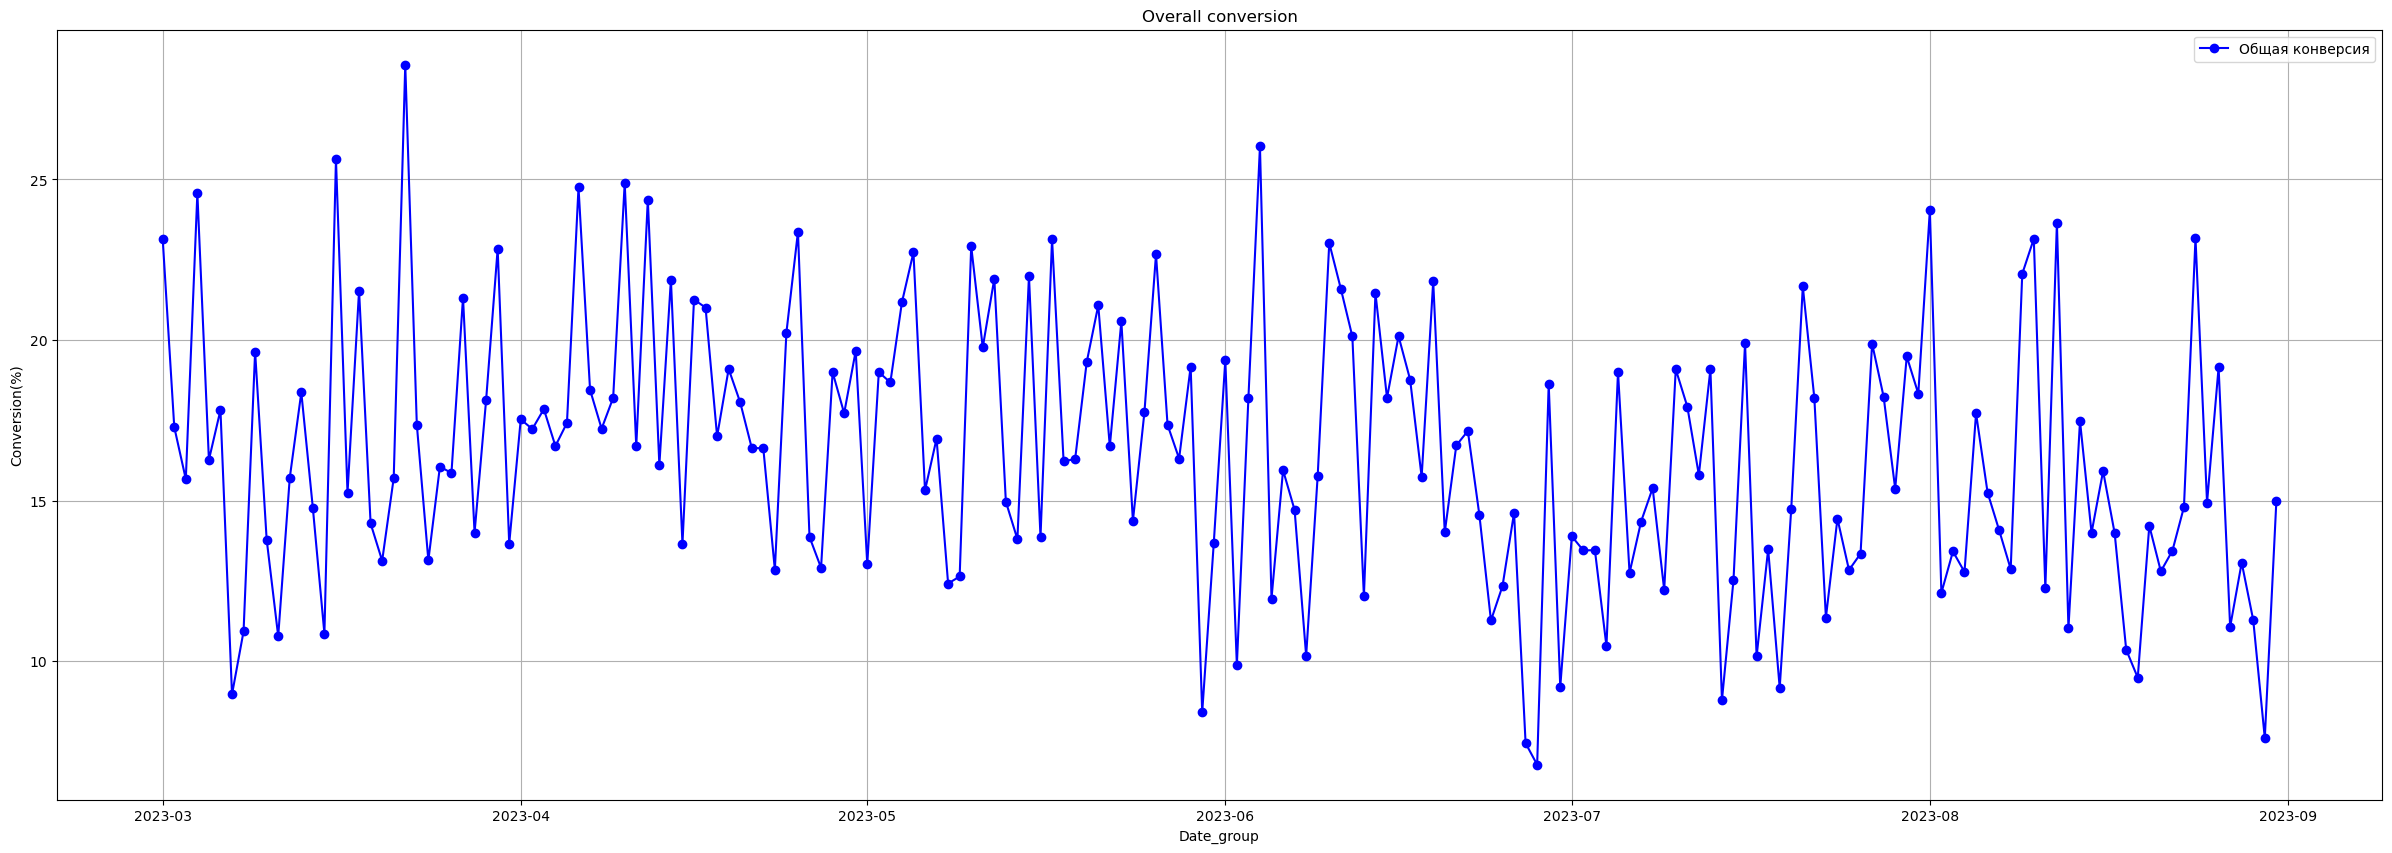

In [139]:
#5

plt.figure(figsize=(30, 10))

plt.plot(
    'date_group',
    'conversion',
    data=overall_conv,
    marker='o',
    color='blue',
    label='Общая конверсия'
)

plt.legend()
plt.title('Overall conversion')
plt.xlabel('Date_group')
plt.ylabel('Conversion(%)')
plt.grid(True)

plt.savefig('./charts/overall_conversion.png')
plt.show()

In [34]:
#создаем список платформ, считаем среднее значение конверсии для каждой платформы
platforms = conv_df['platform'].unique()
for p in platforms:
    platform_conv = conv_df[conv_df['platform'] == p].drop(['platform', 'visits', 'registrations'], axis=1)
    print (f"average {p} = {platform_conv['conversion'].mean()}")

average android = 76.80412239480349
average ios = 75.88052794248019
average web = 5.823100884407492


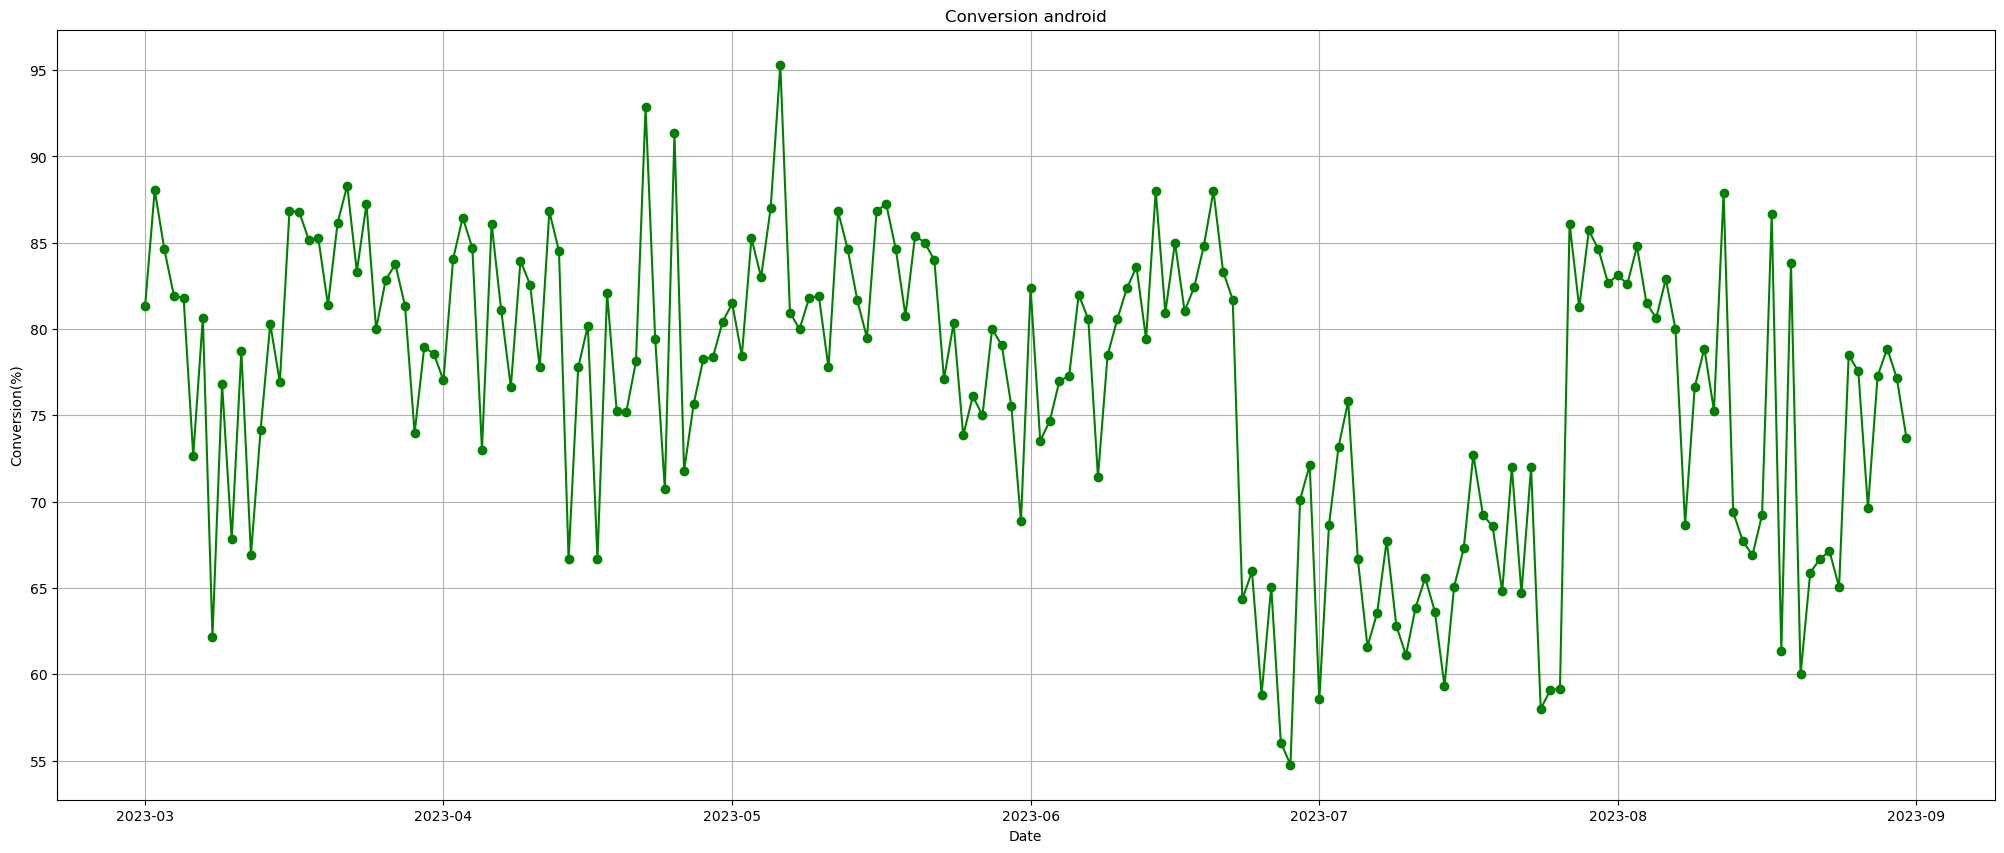

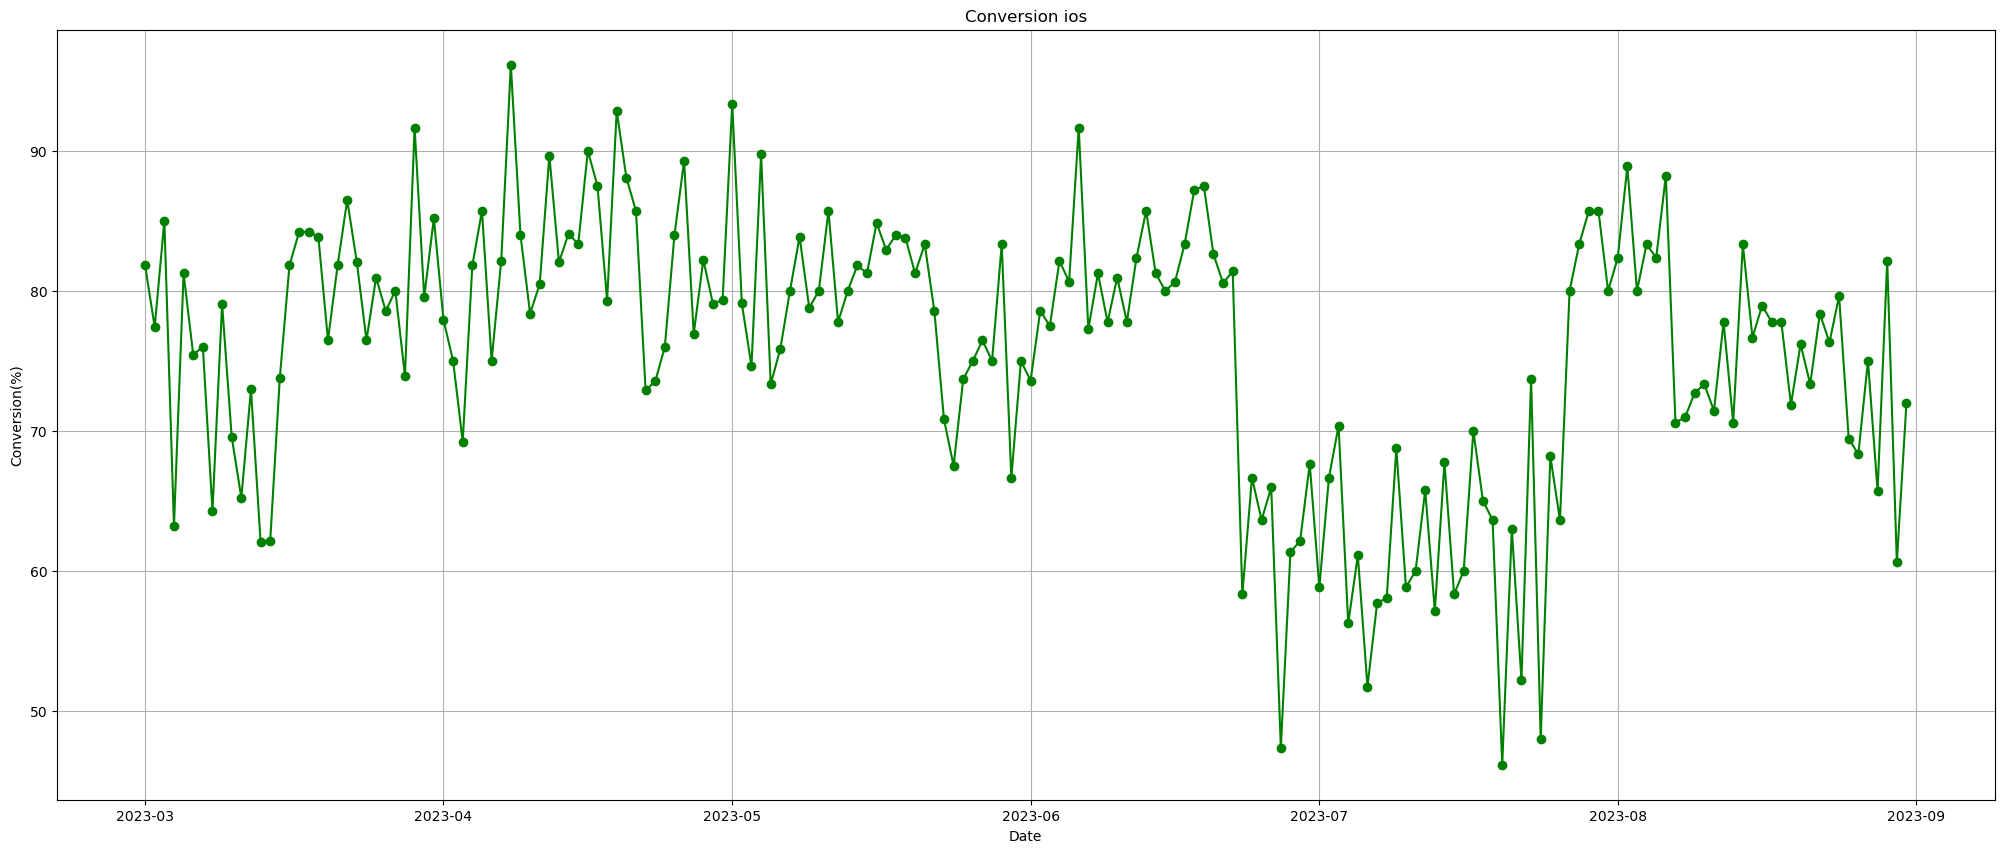

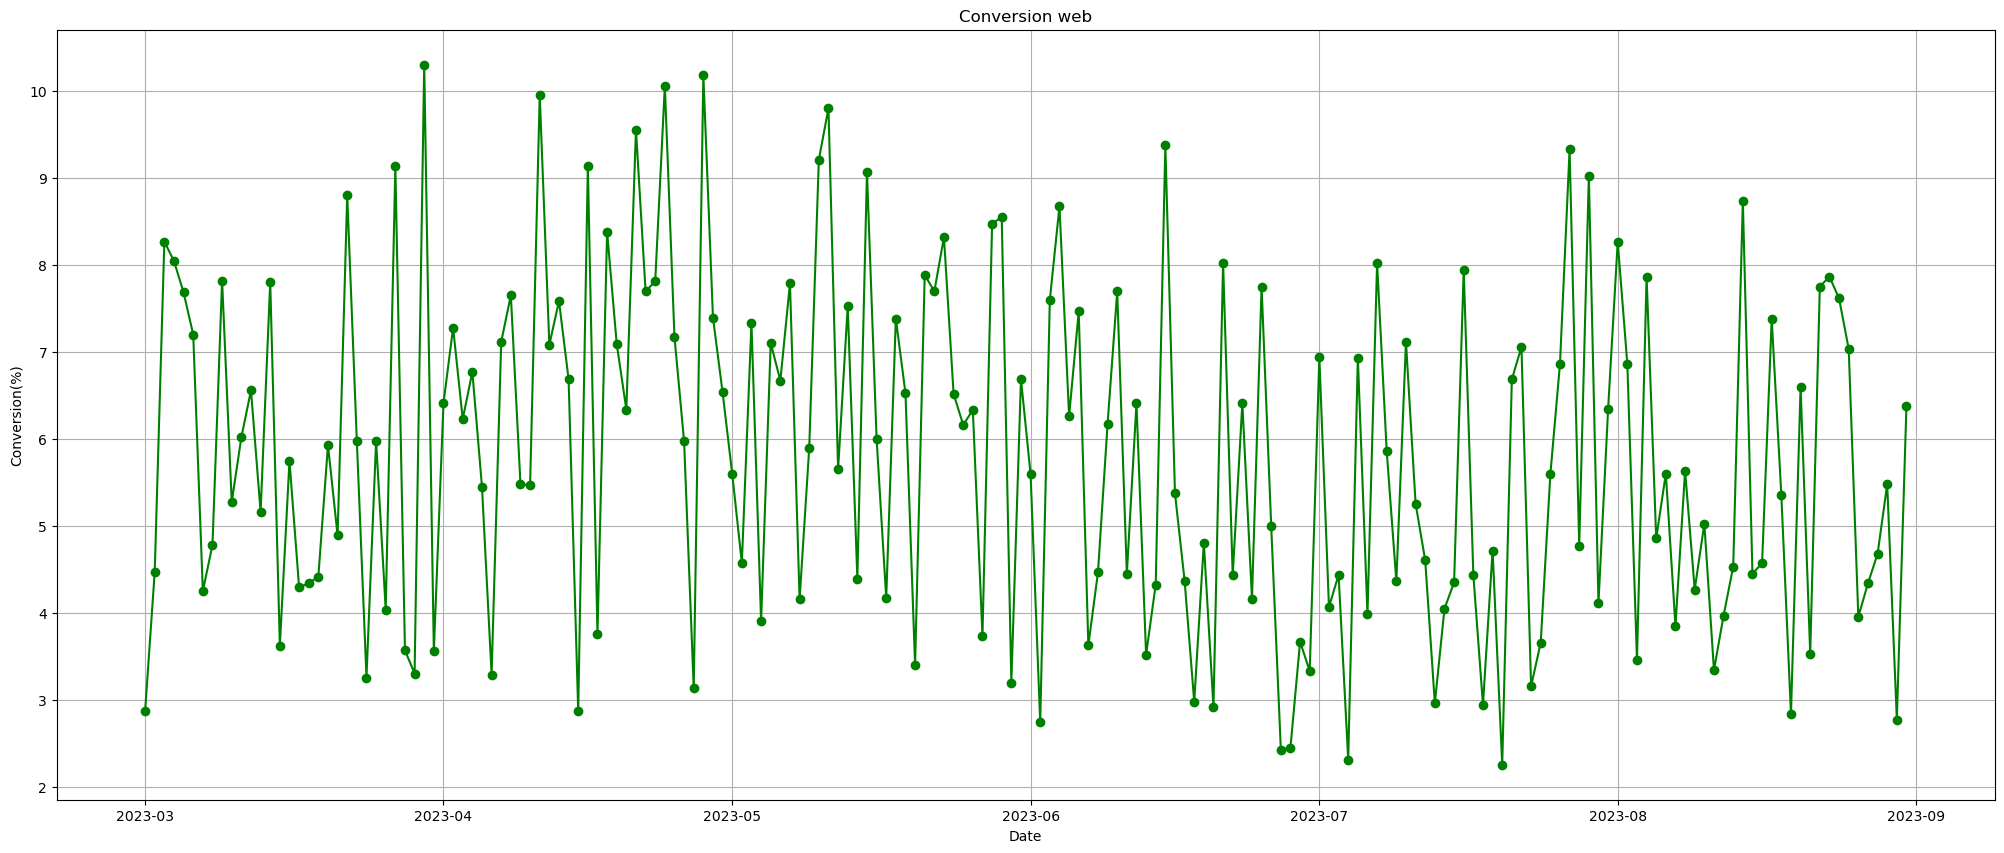

In [140]:
#6, 7, 8

for p in platforms:
    platform_conv = conv_df[conv_df['platform'] == p].drop(['platform', 'visits', 'registrations'], axis=1)
    plt.figure(figsize=(25, 10))

    plt.plot(
        'date_group',
        'conversion',
        data=platform_conv,
        color='green',
        marker='o'
    )

    plt.title(f'Conversion {p}')
    plt.xlabel('Date')
    plt.ylabel('Conversion(%)')
    plt.grid()

    plt.savefig(f'./charts/{p}_conversion.png')
    
plt.show()

In [141]:
#уберем лишние данные для графика
ads_by_day = ads_df.drop(['visits', 'registrations', 'utm_campaign'], axis=1)
ads_by_day

date_group   cost
0   2023-03-01  212.0
1   2023-03-02  252.0
2   2023-03-03  202.0
3   2023-03-04  223.0
4   2023-03-05  265.0
..         ...    ...
179 2023-08-27  222.0
180 2023-08-28  223.0
181 2023-08-29  190.0
182 2023-08-30  109.0
183 2023-08-31  215.0

[184 rows x 2 columns]

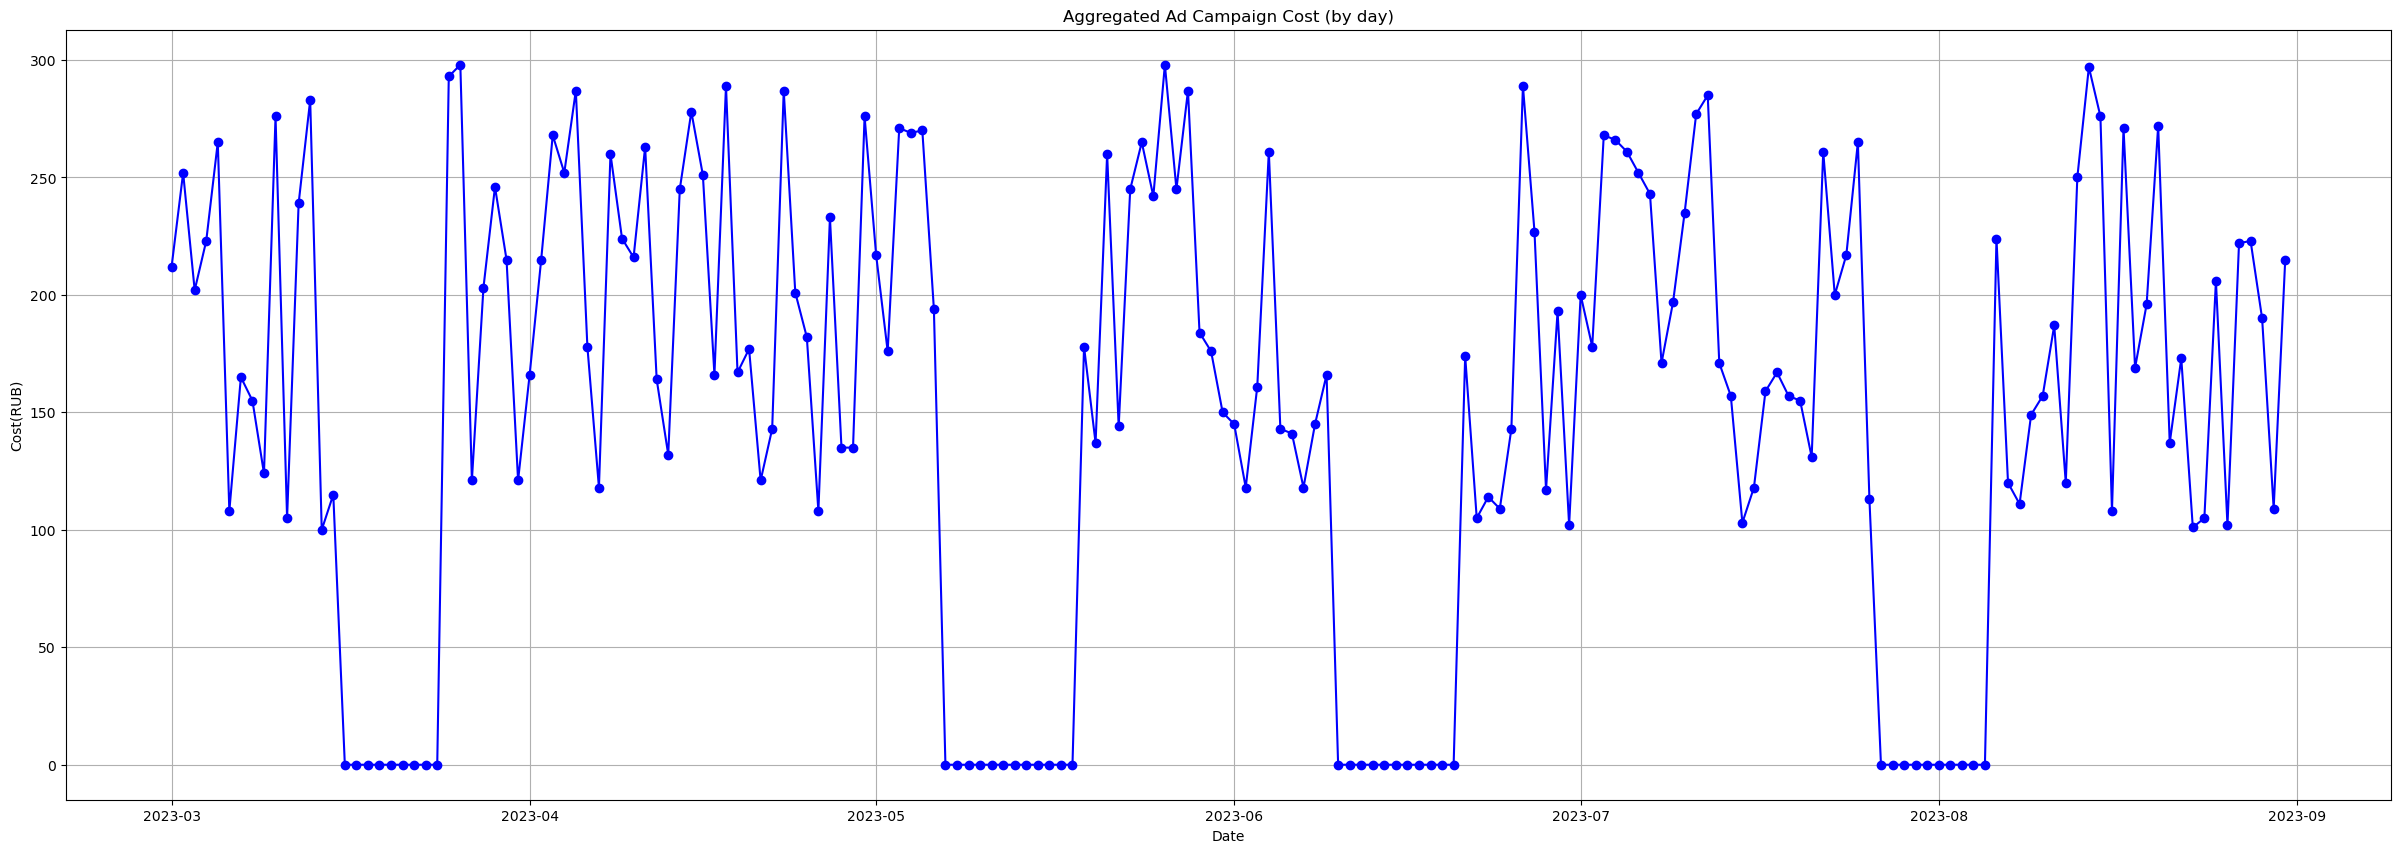

In [142]:
#9

plt.figure(figsize = (30, 10))

plt.plot(
    'date_group',
    'cost',
    data=ads_by_day,
    marker='o',
    color='blue'
)

plt.title('Aggregated Ad Campaign Cost (by day)')
plt.xlabel('Date')
plt.ylabel('Cost(RUB)')
plt.grid(True)

plt.savefig('./charts/ads_cost.png')
plt.show()

In [143]:
campaign_periods = ads_df.groupby(['utm_campaign']).agg(start = ('date_group', 'min'), end = ('date_group', 'max')).reset_index()
campaign_periods

utm_campaign      start        end
0  advanced_algorithms_series 2023-03-01 2023-03-15
1      intro_to_python_course 2023-08-06 2023-08-31
2          ui_ux_design_drive 2023-05-19 2023-06-09
3    virtual_reality_workshop 2023-03-25 2023-05-06
4     women_in_tech_symposium 2023-06-21 2023-07-26

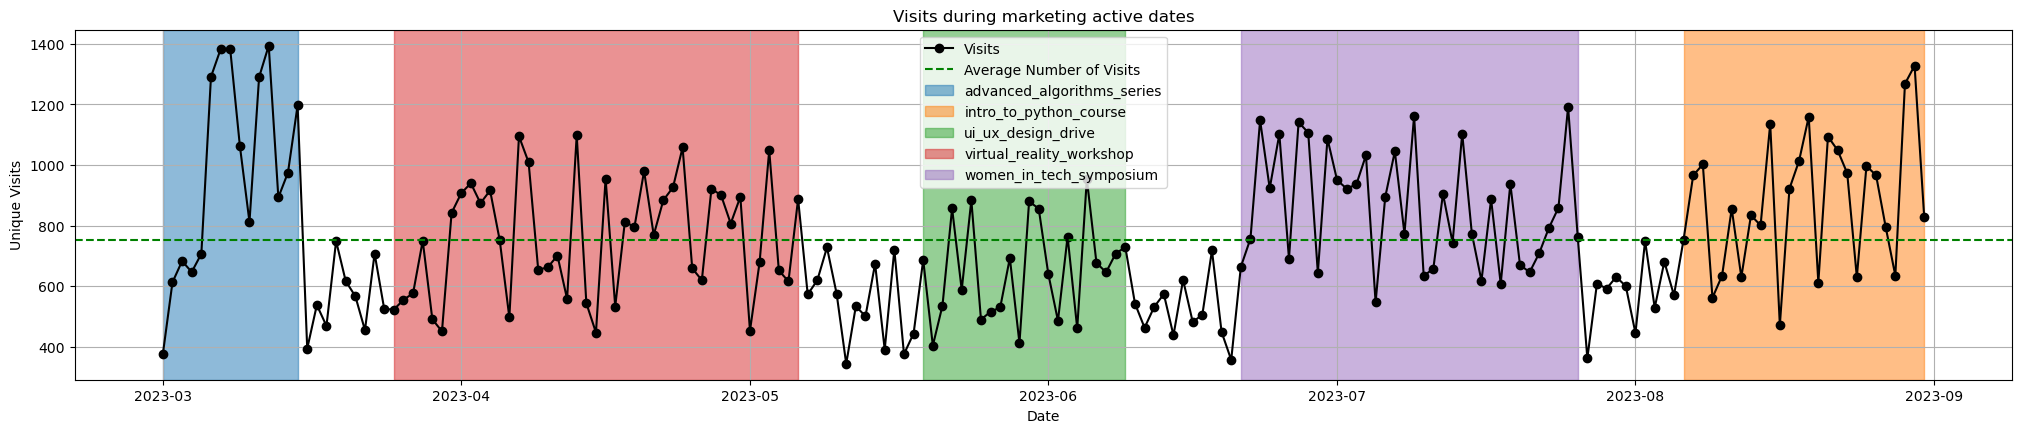

In [144]:
#10

plt.figure(figsize = (25, 10))

campaign_colors = dict(zip(campaign_periods['utm_campaign'].unique(), plt.cm.tab10.colors[:len(campaign_periods['utm_campaign'].unique())]))
plt.subplot(2, 1, 1)

plt.plot(ads_df['date_group'], ads_df['visits'], marker='o', color='black', label='Visits')
plt.axhline(y=np.nanmean(ads_df.visits), linestyle='dashed', color='green', label='Average Number of Visits')
for _,row in campaign_periods.iterrows():
    plt.axvspan(row['start'], row['end'], label=row['utm_campaign'], color=campaign_colors[row['utm_campaign']], alpha=0.5)
plt.title('Visits during marketing active dates')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.grid(True)

plt.savefig('./charts/ads_visits.png')
plt.show()

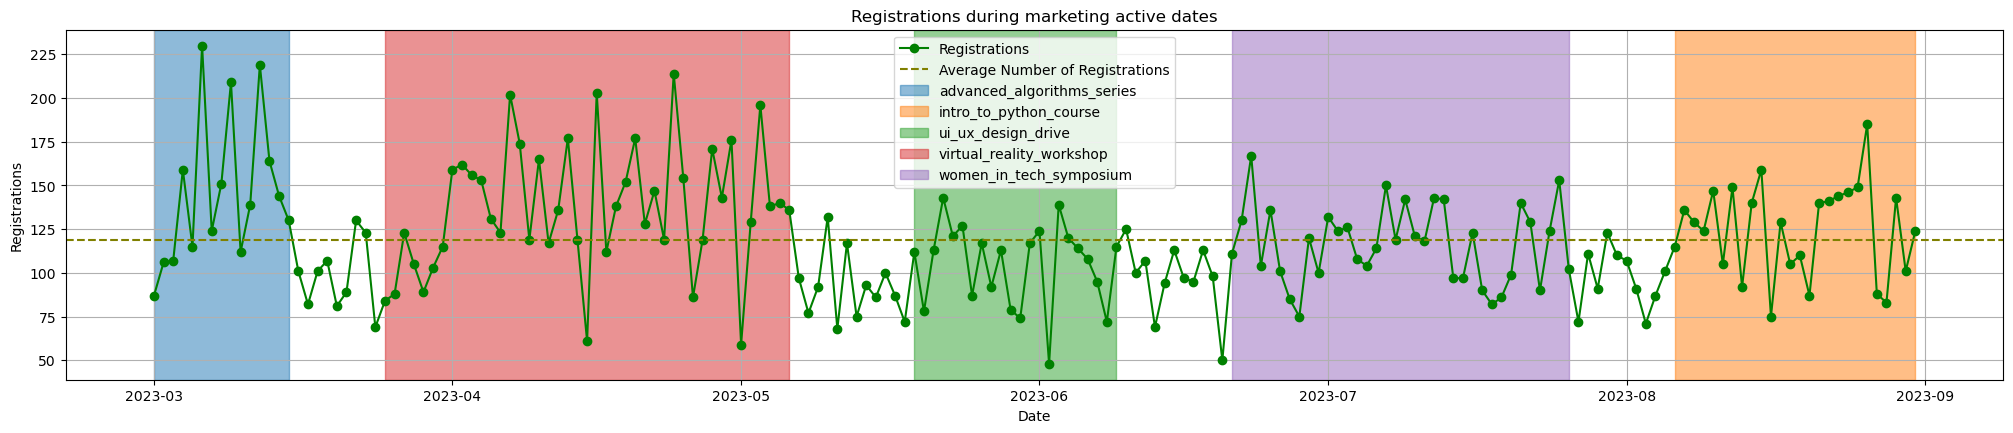

In [145]:
#11

plt.figure(figsize=(25,10))

campaign_colors = dict(zip(campaign_periods['utm_campaign'].unique(), plt.cm.tab10.colors[:len(campaign_periods['utm_campaign'].unique())]))
plt.subplot(2, 1, 1)

plt.plot(ads_df['date_group'], ads_df['registrations'], marker='o', color='green', label='Registrations')
plt.axhline(y=np.nanmean(ads_df.registrations), linestyle='dashed', color='olive', label='Average Number of Registrations')
for _,row in campaign_periods.iterrows():
    plt.axvspan(row['start'], row['end'], label=row['utm_campaign'], color=campaign_colors[row['utm_campaign']], alpha=0.5)
plt.title('Registrations during marketing active dates')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.grid(True)

plt.savefig('./charts/ads_registrations.png')
plt.show()